In [2]:
import scipy
import os
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
from gettingsegments import extract_segments, plot_signal

In [4]:
current_dir = os.getcwd()
os.chdir('c:\\Users\\Melanie\\OneDrive - Rensselaer Polytechnic Institute\\Desktop\\School\\24_Spring\\MLE\\Project\\data')

electrode_locations = {"FP1": 0, "FP2": 1, "FC5": 2, "FC6": 3, "FZ": 4,
                        "T7": 5, "CZ": 6, "T8": 7, "P7": 8, "P3": 9, "PZ": 10,
                          "P4": 11, "P8": 12, "O1": 13, "Oz": 14, "O2": 15}

files = os.listdir()

#getting the demographics both gets rid   
demographics = pd.read_csv(files.pop(0),names=["Isman","Age","Fatigue"])
n = np.shape(demographics)[0]

#### Get the number of components that the data gets for different explained variance amounts

In [56]:
def PCA_decomposition(files,explained_variance):
    pca = PCA(whiten = True, n_components = explained_variance) #whiten means making mean = 0, sd = 1

    pca_dimensions = np.zeros(n)
    for i,f in enumerate(files):
        t, signal, section_num, class_bool, p_num = extract_segments(f)

        new_signal = pca.fit_transform(signal.T).T

        pca_dimensions[i] = np.shape(new_signal)[0]
    return pca_dimensions

In [57]:
demographics["99% Variance Dimensions"] = PCA_decomposition(files, 0.99)
demographics["95% Variance Dimensions"] = PCA_decomposition(files, 0.95)

#### Doing some plots to look for connections

In [29]:
import seaborn as sns

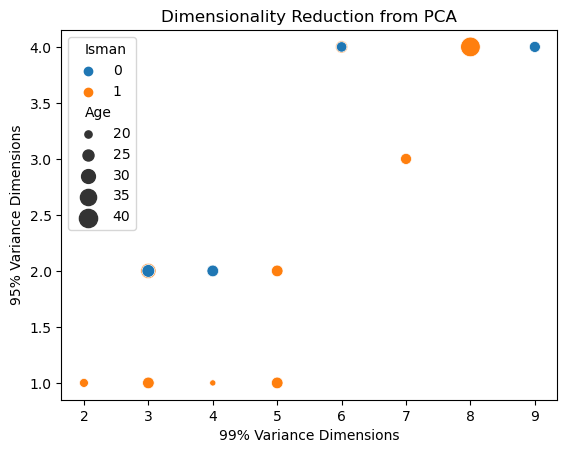

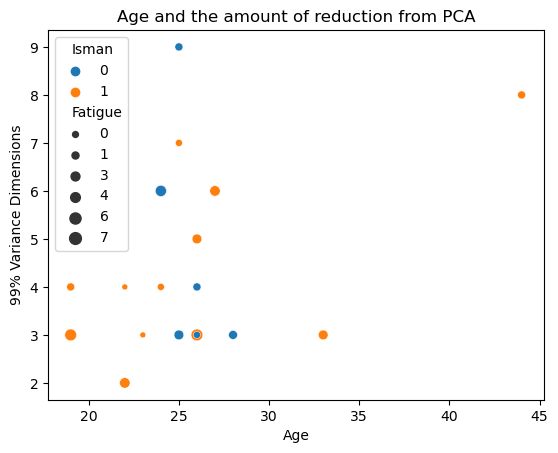

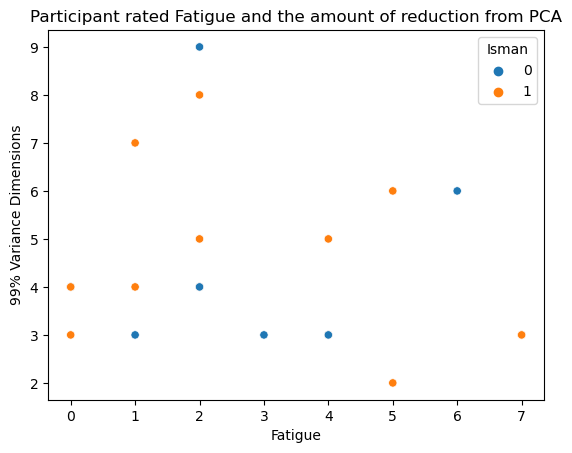

In [58]:
sns.scatterplot(x="99% Variance Dimensions",
                y="95% Variance Dimensions", 
                data = demographics, 
                hue='Isman', 
                size = "Age", sizes = (20,200))
plt.title("Dimensionality Reduction from PCA")
plt.show()

sns.scatterplot(x="Age", y="99% Variance Dimensions", data = demographics, hue='Isman', size = "Fatigue")
plt.title("Age and the amount of reduction from PCA")
plt.show()

sns.scatterplot(x="Fatigue", y="99% Variance Dimensions", data = demographics, hue='Isman')
plt.title("Participant rated Fatigue and the amount of reduction from PCA")
plt.show()

#### i want to see if I can measure the amount of noise in a dataset

In [62]:
#i'm going to give it a go using standard deviation, a metric that technically i don't think I can use lmfao
avg_std = np.zeros(n)
for i,f in enumerate(files):
    t, signal, section_num, class_bool, p_num = extract_segments(f)
    avg_std[i] = np.average(np.std(signal,axis=1))

demographics["Avg std"] = avg_std

In [63]:
avg_std

array([566.67768537, 310.79785294,  84.82741549, 107.98396848,
       214.15887395, 199.33116769,  77.95525218, 261.80862432,
       225.77503181, 184.76357341,  96.93269448, 197.60175033,
       304.03037128, 205.80030044, 271.94631018, 256.43232511,
       199.03797941, 236.50311818, 160.08991617, 166.85706687])

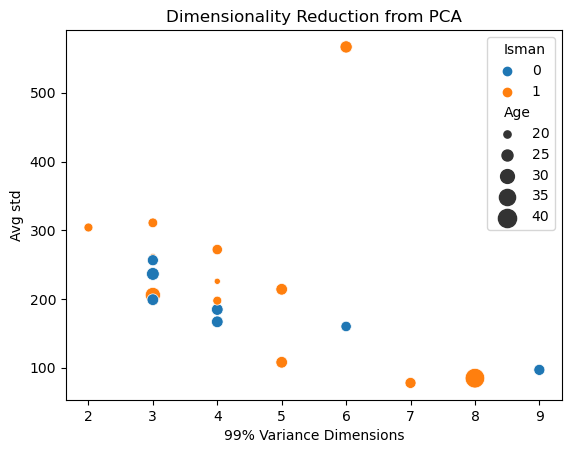

In [64]:
sns.scatterplot(x="99% Variance Dimensions",
                y="Avg std", 
                data = demographics, 
                hue='Isman', 
                size = "Age", sizes = (20,200))
plt.title("Dimensionality Reduction from PCA")
plt.show()

### Symmetric matrices??

In [5]:
t, signal, section_num, class_bool, p_num = extract_segments(files[0])

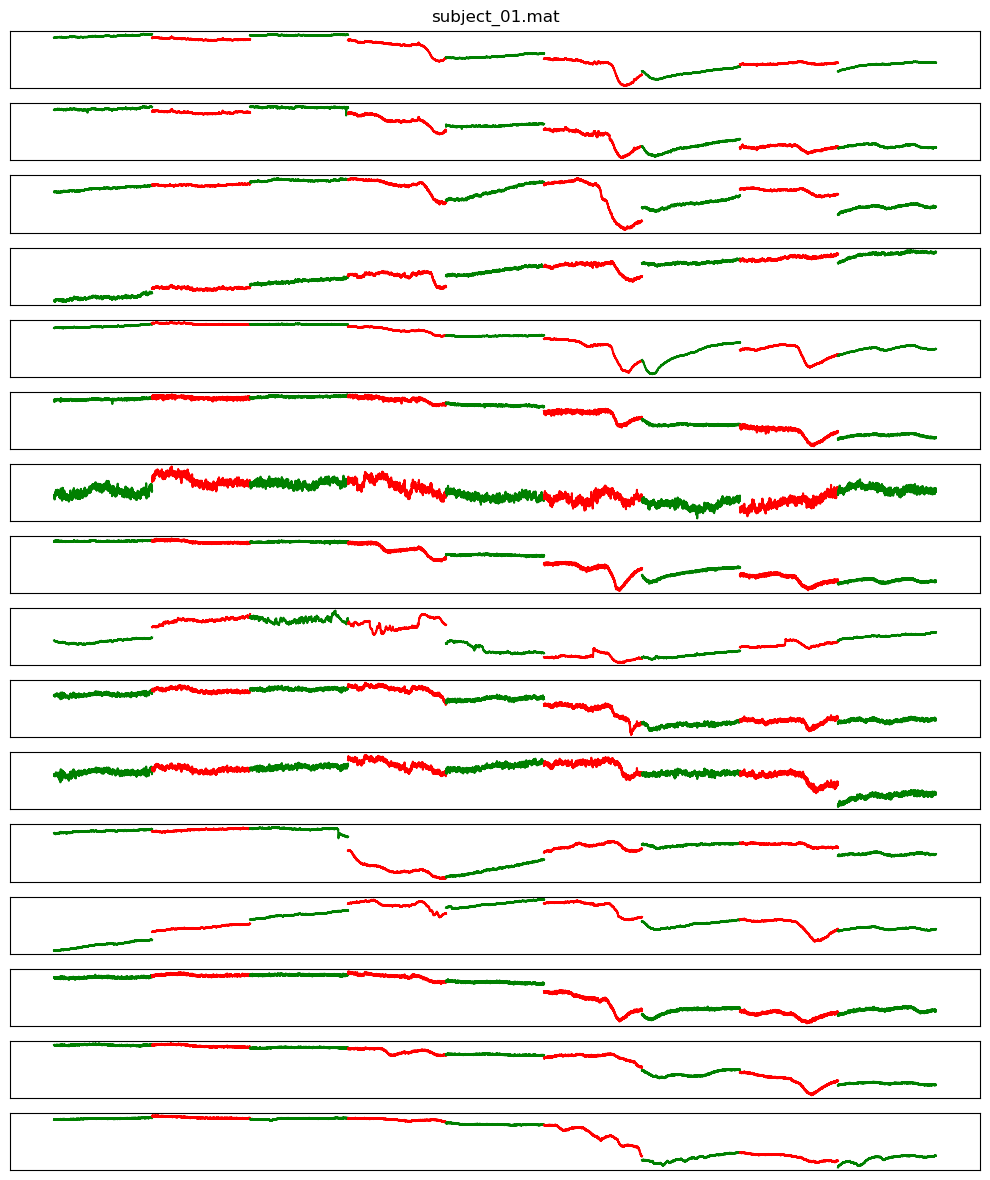

In [8]:
plot_signal(section_num, t, signal, class_bool, "{}".format(files[0]))